In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from money_tools import Mortgage
from datetime import datetime

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt


In [4]:
# test case
mortgage = Mortgage(100_000,
                    20,
                    0.05,
                    1000,
                    start_date=datetime(2019,1,1),
                    end_date=datetime(2039,12,31)
                    )

mortgage.schedule_monthly['End Balance'].iloc[-1]

38.53999999987898

In [5]:
mortgage.schedule_monthly.tail()

,Payment,Interest,Additional_Payment,End Balance,Month Date,Principal
124,1000.0,17.18,0,4012.38,2029-05-01,982.82
125,1000.0,12.44,0,3024.82,2029-06-01,987.56
126,1000.0,8.81,0,2033.63,2029-07-01,991.19
127,1000.0,4.48,0,1038.11,2029-08-01,995.52
128,1000.0,0.43,0,38.54,2029-09-01,999.57


In [ ]:
general_plot_properties = dict(linewidth=1.0, marker='', linestyle='-')

def plot_results(monthly_schedule):
    """
    Visual the monthly schedule
    """

    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 10))
    
    # remaining Balance plots
    ax1.plot(monthly_schedule["Month Date"], monthly_schedule["End Balance"], color='r', label='Payment', **general_plot_properties)

    # Breakdown of monthly payment plots
    ax2.plot(monthly_schedule["Month Date"], monthly_schedule["Payment"], color='k', label='Payment', **general_plot_properties)
    ax2.plot(monthly_schedule["Month Date"], monthly_schedule["Interest"], color='b', label='Interest Paid', **general_plot_properties)
    ax2.plot(monthly_schedule["Month Date"], monthly_schedule["Principal"], color='g', label='Pricipal Paid', **general_plot_properties)
    
    ax1.set_ylabel('Amount')
    ax2.set_ylabel('Amount')
    ax2.set_xlabel('Payment Month')
    
    # rotate x-labels 45deg
    for tick in ax2.get_xticklabels():
        tick.set_rotation(45)

    ax1.legend()
    ax2.legend()
    
    
def plot_cumulative_results(monthly_schedule):
    """
    Visualise the cumulative monthly schedule 
    """
    
    monthly_schedule['Cumulative Payment'] = monthly_schedule['Payment'].cumsum()
    monthly_schedule['Cumulative Principal'] = monthly_schedule['Principal'].cumsum()
    monthly_schedule['Cumulative Interest'] = monthly_schedule['Interest'].cumsum()
    
    plt.figure()
    plt.plot(monthly_schedule["Month Date"], monthly_schedule["End Balance"], color='r', label='Remaining Balance', **general_plot_properties)
    plt.plot(monthly_schedule["Month Date"], monthly_schedule["Cumulative Payment"], color='k', label='Cumulative Payments', **general_plot_properties)
    plt.plot(monthly_schedule["Month Date"], monthly_schedule["Cumulative Principal"], color='b', label='Cumulative Principal Paid', **general_plot_properties)
    plt.plot(monthly_schedule["Month Date"], monthly_schedule["Cumulative Interest"], color='g', label='Cumulative Interest Paid', **general_plot_properties)
    
    plt.legend()
    plt.xlabel('Payment Month')
    plt.xticks(rotation=45)
    plt.ylabel('Amount')


In [ ]:
plot_results(schedule_mon)

# schedule_mon.plot('Date', 'End Balance', marker='o')
# schedule_mon.plot('Date', 'Interest', marker='o', color='r')
# schedule_mon.plot('Date', 'Principal', marker='o', color='g')


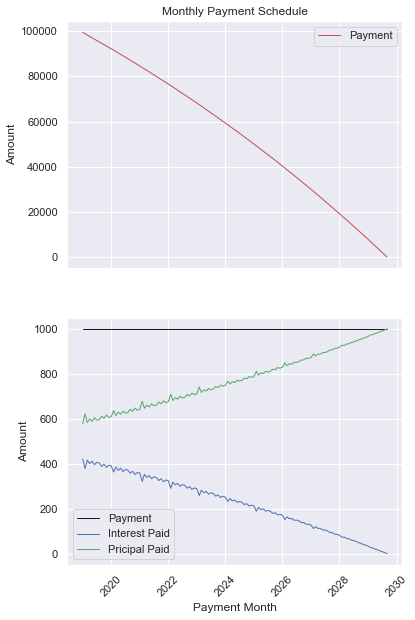

In [13]:
mortgage.plot_monthly_schedule()

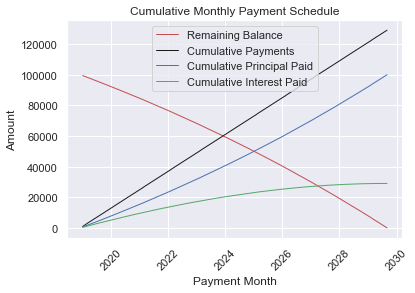

In [11]:
mortgage.plot_cumulative_monthly_schedule()